#Paquetes necesarios

In [66]:
import cv2  
import math
import os
import pytesseract
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO

In [6]:
# Entrenar aquí 👍
# Load a model
model = YOLO('yolov8n.pt')  # load a pretrained model (recommended for training)

# Use the model
# clase 0 => 77, clase 1 => 2
# PENDIENTE HACER SCRIPT QUE PASE NUMEROS DE CLASE A LOS CORRECTOS
results = model.train(data=os.path.join(os.getcwd(), "dataset/data/data.yaml"), epochs=100)  # train the model

New https://pypi.org/project/ultralytics/8.0.216 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.203 🚀 Python-3.11.5 torch-2.1.0+cu121 CPU (Intel Core(TM) i7-7700HQ 2.80GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/home/equipo/UNI/VC/P5/dataset/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train13, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visual

RuntimeError: Dataset '/home/equipo/UNI/VC/P5/dataset/data.yaml' error ❌ '/home/equipo/UNI/VC/P5/dataset/data.yaml' does not exist

Desde cámara, detección con yolov8 y modelo nano. Visualización propia

In [9]:
# Carga del modelo
model = YOLO('runs/detect/train/weights/best.pt') #Contenedores

# Nombre de las distintas clases
classNames = ["person", "bicycle", "car", "motorbike", "aeroplane", "bus", "train", "truck", "boat",
              "traffic light", "fire hydrant", "stop sign", "parking meter", "bench", "bird", "cat",
              "dog", "horse", "sheep", "cow", "elephant", "bear", "zebra", "giraffe", "backpack", "umbrella",
              "handbag", "tie", "suitcase", "frisbee", "skis", "snowboard", "sports ball", "kite", "baseball bat",
              "baseball glove", "skateboard", "surfboard", "tennis racket", "bottle", "wine glass", "cup",
              "fork", "knife", "spoon", "bowl", "banana", "apple", "sandwich", "orange", "broccoli",
              "carrot", "hot dog", "pizza", "donut", "cake", "chair", "sofa", "pottedplant", "bed",
              "diningtable", "toilet", "tvmonitor", "laptop", "mouse", "remote", "keyboard", "cell phone",
              "microwave", "oven", "toaster", "sink", "refrigerator", "book", "clock", "vase", "scissors",
              "licence plate", "hair drier", "toothbrush"
              ]

debug = False

# Captura desde lawebcam
vid = cv2.VideoCapture(0)
  
while(True):      
    # fotograma a fotograma
    ret, img = vid.read()
  
    # si hay imagen válida
    if ret:  
        # Perform inference on an image
        results = model(img, stream=True)
        
        # Para cada detección
        for r in results:
            boxes = r.boxes

            box = None
            for i in boxes:
                if box.cls[0] == 77:
                    box = i
                    break
            
            # Clase
            cls = int(box.cls[0])

            if cls == 77:
                x1, y1, x2, y2 = box.xyxy[0]
                x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2) # convert to int values
                licence_img = img[y1:y2,x1:x2]
                print(pytesseract.image_to_string(licence_img))

            if debug:
                for box in boxes:
                    # Contenedor
                    x1, y1, x2, y2 = box.xyxy[0]
                    x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2) # convert to int values
                    
                    # Confianza
                    confidence = math.ceil((box.conf[0]*100))/100
                    # print("Confidence --->",confidence)

                    # Clase
                    cls = int(box.cls[0])

                    # Convierte identificador numérico de clase a un color RGB
                    escala = int((cls / len(classNames)) * 255 * 3)
                    if escala >= 255*2:
                        R = 255
                        G = 255
                        B = escala - 255*2
                    elif escala >= 255:
                        R = 255
                        G = escala - 255
                        B = 0
                    else:
                        R = escala
                        G = 0
                        B = 0

                    # Dibuja el contenedor y clase
                    cv2.rectangle(img, (x1, y1), (x2, y2), (R, G, B), 3)
                    cv2.putText(img, classNames[cls] , [x1, y1], cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, B), 2)

        # Muestra fotograma
        cv2.imshow('Vid', img)
    
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

FileNotFoundError: [Errno 2] No existe el fichero o el directorio: 'runs/detect/train/weights/best.pt'


/tmp/ipykernel_255/2760401476.py:113: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)


11010.28722936369 3698.5
13977.748136000242 1693.5


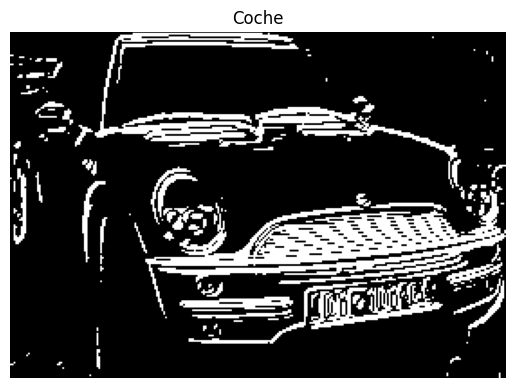

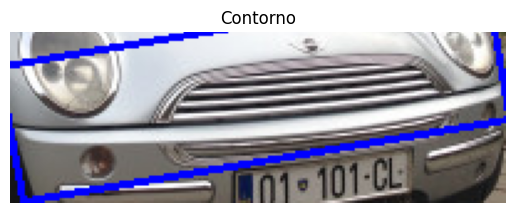

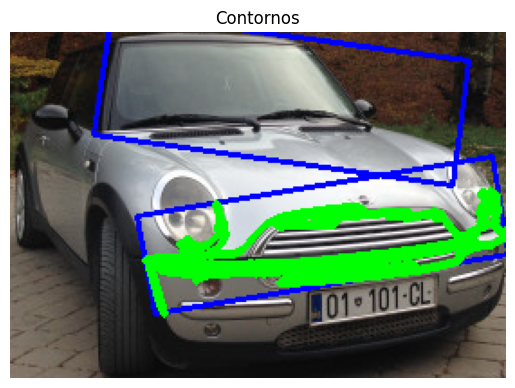

In [71]:
# Carga del modelo
model = YOLO('yolov8n.pt') #Contenedores

# Nombre de las distintas clases
classNames = ["person", "bicycle", "car", "motorbike", "aeroplane", "bus", "train", "truck", "boat",
              "traffic light", "fire hydrant", "stop sign", "parking meter", "bench", "bird", "cat",
              "dog", "horse", "sheep", "cow", "elephant", "bear", "zebra", "giraffe", "backpack", "umbrella",
              "handbag", "tie", "suitcase", "frisbee", "skis", "snowboard", "sports ball", "kite", "baseball bat",
              "baseball glove", "skateboard", "surfboard", "tennis racket", "bottle", "wine glass", "cup",
              "fork", "knife", "spoon", "bowl", "banana", "apple", "sandwich", "orange", "broccoli",
              "carrot", "hot dog", "pizza", "donut", "cake", "chair", "sofa", "pottedplant", "bed",
              "diningtable", "toilet", "tvmonitor", "laptop", "mouse", "remote", "keyboard", "cell phone",
              "microwave", "oven", "toaster", "sink", "refrigerator", "book", "clock", "vase", "scissors",
              "teddy bear", "hair drier", "toothbrush"
              ]

debug = False

img = cv2.imread('coche3.jpg')

# Perform inference on an image
results = model(img, stream=True)
box = None
# Para cada detección
for r in results:
    boxes = r.boxes

    for i in boxes: # Asumimos que solo pueda haber un coche
        if i.cls[0] == 2:
            box = i
            break
    if box:
        break

    if debug:
        for box in boxes:
            # Contenedor
            x1, y1, x2, y2 = box.xyxy[0]
            x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2) # convert to int values
            
            # Confianza
            confidence = math.ceil((box.conf[0]*100))/100
            # print("Confidence --->",confidence)

            # Clase
            clss = int(box.cls[0])

            # Convierte identificador numérico de clase a un color RGB
            escala = int((clss / len(classNames)) * 255 * 3)
            if escala >= 255*2:
                R = 255
                G = 255
                B = escala - 255*2
            elif escala >= 255:
                R = 255
                G = escala - 255
                B = 0
            else:
                R = escala
                G = 0
                B = 0

# Clase
clss = int(box.cls[0])
# print("Class name -->", classNames[cls])
x1, y1, x2, y2 = box.xyxy[0]
x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2) # convert to int values

car = img[y1:y2,x1:x2]
car = cv2.cvtColor(car, cv2.COLOR_BGR2RGB)

car_gris = cv2.cvtColor(car, cv2.COLOR_RGB2GRAY)

ggris = cv2.GaussianBlur(car_gris, (3, 3), 0)
#Dos umbralizados. Te invito a probar con parámetros, aplicar filtro previo, etc.
umbral = 120
# Umbralizado con método de Otsu
#ret, img_th2 = cv2.threshold(car_gris, umbral, 255, cv2.THRESH_BINARY)
#ret2,img_th2 = cv2.threshold(car_gris,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

#Calcula en ambas direcciones (horizontal y vertical)
sobelx = cv2.Sobel(ggris, cv2.CV_64F, 1, 0)  # x
sobely = cv2.Sobel(ggris, cv2.CV_64F, 0, 1)  # y
#Combina ambos resultados
sobel = cv2.add(sobelx, sobely)
img_th2 = cv2.convertScaleAbs(sobel)
ret, img_th2 = cv2.threshold(img_th2, umbral, 255, cv2.THRESH_BINARY)

plt.figure()
plt.axis("off")
plt.imshow(img_th2, cmap="gray")
plt.title('Coche')

#Obtiene únicamente los contornos externos
contornos2, hierarchy2 = cv2.findContours(img_th2, 
    cv2.RETR_EXTERNAL , 
    cv2.CHAIN_APPROX_SIMPLE)

for c in contornos2:
    #Área delcontorno
    area = cv2.contourArea(c)
    area_min = 1000
    area_max = 10000
    #Dimensión mínima (útil en ocasiones)
    if area > area_min and area < area_max:
        #Contenedor alineado con ejes de la imagen
        x,y,w,h = cv2.boundingRect(c)

        #Mínimo contenedor ajustado para el contorno
        rect = cv2.minAreaRect(c)
        rect_area= rect[1][1] * rect[1][0]
        
        if rect_area > area*3:
            continue
        
        lp = car[y:y+h,x:x+w]
        plt.figure()
        plt.axis("off")
        plt.imshow(lp)
        plt.title('Contorno')

        #Dibuja los contornos
        cv2.drawContours(car, [c], -1, (0,255,0), 3)
        pytesseract.image_to_string(lp)


plt.figure()
plt.axis("off")
plt.imshow(car)
plt.title('Contornos')



cv2.waitKey(0)
cv2.destroyAllWindows()